In [1]:
# Demonstrate a non-parametric (parzen) density estimator in 1D

# Author: Gerardo Durán Martín


import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from scipy.linalg import norm

plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False


try:
    from probml_utils import savefig, latexify
except ModuleNotFoundError:
    %pip install -qq git+https://github.com/probml/probml-utils.git
    from probml_utils import savefig, latexify

In [2]:
# import os
# os.environ["LATEXIFY"] = "1"
# os.environ["FIG_DIR"] = "."

In [3]:
latexify(width_scale_factor=2, fig_height=1.5)

/home/prey241/.local/lib/python3.8/site-packages/probml_utils/plotting.py:69: UserWarning: renaming ./parzen_windows1.pdf to ./parzen_windows1_latexified.pdf because LATEXIFY is True
  warnings.warn(


saving image to ./parzen_windows1_latexified.pdf
Figure size: [3.  1.5]


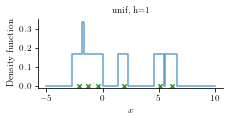

saving image to ./parzen_windows2_latexified.pdf
Figure size: [3.  1.5]


/home/prey241/.local/lib/python3.8/site-packages/probml_utils/plotting.py:69: UserWarning: renaming ./parzen_windows2.pdf to ./parzen_windows2_latexified.pdf because LATEXIFY is True
  warnings.warn(


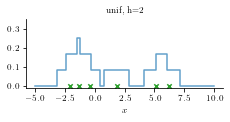

/home/prey241/.local/lib/python3.8/site-packages/probml_utils/plotting.py:69: UserWarning: renaming ./parzen_windows3.pdf to ./parzen_windows3_latexified.pdf because LATEXIFY is True
  warnings.warn(


saving image to ./parzen_windows3_latexified.pdf
Figure size: [3.  1.5]


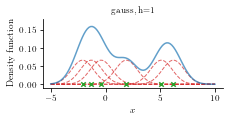

/home/prey241/.local/lib/python3.8/site-packages/probml_utils/plotting.py:69: UserWarning: renaming ./parzen_windows4.pdf to ./parzen_windows4_latexified.pdf because LATEXIFY is True
  warnings.warn(


saving image to ./parzen_windows4_latexified.pdf
Figure size: [3.  1.5]


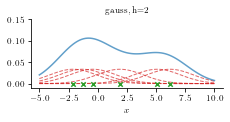

In [4]:
def K(u, axis=0):
    return np.all(np.abs(u) <= 1 / 2, axis=axis)


def p1(x, X, h):
    """
    KDE under a unit hypercube
    """
    N, D = X.shape
    xden, _ = x.shape

    u = ((x - X.T) / h).reshape(D, xden, N)
    ku = K(u).sum(axis=1) / (N * h**D)
    return ku


def kdeg(x, X, h, return_components=False):
    """
    KDE under a gaussian kernel
    """
    N, D = X.shape
    nden, _ = x.shape

    Xhat = X.reshape(D, 1, N)
    xhat = x.reshape(D, nden, 1)
    u = xhat - Xhat
    u = norm(u, ord=2, axis=0) ** 2 / (2 * h**2)  # (N, nden)
    px = np.exp(-u)
    if not return_components:
        px = px.sum(axis=1)

    px = px / (N * h * np.sqrt(2 * np.pi))
    return px


def main():
    data = np.array([-2.1, -1.3, -0.4, 1.9, 5.1, 6.2])[:, None]
    yvals = np.zeros_like(data)
    xv = np.linspace(-5, 10, 100)[:, None]

    # Uniform h=1
    plt.scatter(data, yvals, marker="x", c="tab:green", s=20)
    plt.step(xv, p1(xv, data, 1), c="tab:blue", alpha=0.7)
    plt.ylim([-0.01, 0.35])
    plt.yticks(np.arange(0, 0.35, 0.1))
    plt.title("unif, h=1")
    plt.xlabel("$x$")
    plt.ylabel("Density function")
    savefig("parzen_windows1.pdf", dpi=300)
    plt.show()

    # Uniform h=2
    plt.figure()
    plt.scatter(data, yvals, marker="x", c="tab:green", s=20)
    plt.step(xv, p1(xv, data, 2), c="tab:blue", alpha=0.7)
    plt.ylim([-0.01, 0.35])
    plt.yticks(np.arange(0, 0.35, 0.1))
    plt.title("unif, h=2")
    plt.xlabel("$x$")
    savefig("parzen_windows2.pdf", dpi=300)
    plt.show()

    # Gaussian h=1
    plt.figure()
    plt.scatter(data, yvals, marker="x", c="tab:green", zorder=3, s=20)
    plt.plot(xv, kdeg(xv, data, 1), c="tab:blue", alpha=0.7, zorder=2)
    plt.plot(xv, kdeg(xv, data, 1, True), c="tab:red", alpha=0.7, linestyle="--", zorder=1, linewidth=1)
    plt.ylim([-0.01, 0.18])
    plt.yticks(np.arange(0, 0.16, 0.05))
    plt.title("gauss, h=1")
    plt.xlabel("$x$")
    plt.ylabel("Density function")
    savefig("parzen_windows3.pdf", dpi=300)
    plt.show()

    # Gaussian h=2
    plt.figure()
    plt.scatter(data, yvals, marker="x", c="tab:green", zorder=3, s=20)
    plt.plot(xv, kdeg(xv, data, 2), c="tab:blue", alpha=0.7, zorder=2)
    plt.plot(xv, kdeg(xv, data, 2, True), c="tab:red", alpha=0.7, linestyle="--", zorder=1, linewidth=1)
    plt.ylim([-0.01, 0.1])
    plt.yticks(np.arange(0, 0.16, 0.05))
    plt.title("gauss, h=2")
    plt.xlabel("$x$")
    savefig("parzen_windows4.pdf", dpi=300)
    plt.show()


if __name__ == "__main__":
    main()